In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils
from keras import initializers

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_set_X, train_set_Y), (test_set_X, test_set_Y) = cifar10.load_data()

In [15]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [16]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [17]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [21]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 424us/step - loss: 14.4929 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
42100/50000 [========================>.....] - ETA: 3s - loss: 14.5213 - acc: 0.0990

50000/50000 [==============================] - 21s 415us/step - loss: 14.5057 - acc: 0.1000 - val_loss: 14.5060 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 21s 410us/step - loss: 4.1589 - acc: 0.2290 - val_loss: 1.8489 - val_acc: 0.3398
Epoch 4/100
20400/50000 [===========>..................] - ETA: 11s - loss: 1.8578 - acc: 0.3307

50000/50000 [==============================] - 21s 414us/step - loss: 1.8118 - acc: 0.3491 - val_loss: 1.6817 - val_acc: 0.4009
Epoch 5/100
50000/50000 [==============================] - 21s 416us/step - loss: 1.6701 - acc: 0.4006 - val_loss: 1.5952 - val_acc: 0.4300
Epoch 6/100
16200/50000 [========>.....................] - ETA: 12s - loss: 1.6093 - acc: 0.4249

50000/50000 [==============================] - 21s 416us/step - loss: 1.5896 - acc: 0.4338 - val_loss: 1.6087 - val_acc: 0.4210
Epoch 7/100
50000/50000 [==============================] - 21s 414us/step - loss: 1.5167 - acc: 0.4614 - val_loss: 1.4790 - val_acc: 0.4645
Epoch 8/100
15500/50000 [========>.....................] - ETA: 13s - loss: 1.4576 - acc: 0.4843

50000/50000 [==============================] - 21s 413us/step - loss: 1.4616 - acc: 0.4830 - val_loss: 1.4438 - val_acc: 0.4784
Epoch 9/100
50000/50000 [==============================] - 21s 414us/step - loss: 1.4121 - acc: 0.5016 - val_loss: 1.4549 - val_acc: 0.4763
Epoch 10/100
14800/50000 [=======>......................] - ETA: 13s - loss: 1.3708 - acc: 0.5188

50000/50000 [==============================] - 21s 411us/step - loss: 1.3733 - acc: 0.5161 - val_loss: 1.3964 - val_acc: 0.4961
Epoch 11/100
50000/50000 [==============================] - 20s 410us/step - loss: 1.3324 - acc: 0.5308 - val_loss: 1.3657 - val_acc: 0.5130
Epoch 12/100
14900/50000 [=======>......................] - ETA: 13s - loss: 1.3092 - acc: 0.5429

50000/50000 [==============================] - 21s 410us/step - loss: 1.2997 - acc: 0.5453 - val_loss: 1.3028 - val_acc: 0.5398
Epoch 13/100
50000/50000 [==============================] - 21s 413us/step - loss: 1.2692 - acc: 0.5542 - val_loss: 1.2878 - val_acc: 0.5436
Epoch 14/100
14400/50000 [=======>......................] - ETA: 13s - loss: 1.2594 - acc: 0.5604

50000/50000 [==============================] - 21s 413us/step - loss: 1.2453 - acc: 0.5631 - val_loss: 1.3098 - val_acc: 0.5306
Epoch 15/100
50000/50000 [==============================] - 20s 409us/step - loss: 1.2173 - acc: 0.5751 - val_loss: 1.2634 - val_acc: 0.5502
Epoch 16/100
14700/50000 [=======>......................] - ETA: 13s - loss: 1.1919 - acc: 0.5845

50000/50000 [==============================] - 21s 418us/step - loss: 1.1935 - acc: 0.5834 - val_loss: 1.2530 - val_acc: 0.5505
Epoch 17/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.1709 - acc: 0.5911 - val_loss: 1.2777 - val_acc: 0.5529
Epoch 18/100
14700/50000 [=======>......................] - ETA: 13s - loss: 1.1305 - acc: 0.6080

50000/50000 [==============================] - 21s 414us/step - loss: 1.1485 - acc: 0.5991 - val_loss: 1.2533 - val_acc: 0.5508
Epoch 19/100
50000/50000 [==============================] - 21s 412us/step - loss: 1.1249 - acc: 0.6076 - val_loss: 1.2637 - val_acc: 0.5492
Epoch 20/100
13400/50000 [=======>......................] - ETA: 14s - loss: 1.1151 - acc: 0.6116

50000/50000 [==============================] - 20s 410us/step - loss: 1.1133 - acc: 0.6106 - val_loss: 1.1913 - val_acc: 0.5825
Epoch 21/100
50000/50000 [==============================] - 21s 414us/step - loss: 1.0891 - acc: 0.6201 - val_loss: 1.2491 - val_acc: 0.5638
Epoch 22/100
14200/50000 [=======>......................] - ETA: 14s - loss: 1.0714 - acc: 0.6225

50000/50000 [==============================] - 21s 415us/step - loss: 1.0722 - acc: 0.6261 - val_loss: 1.1995 - val_acc: 0.5820
Epoch 23/100
50000/50000 [==============================] - 21s 415us/step - loss: 1.0551 - acc: 0.6327 - val_loss: 1.2392 - val_acc: 0.5644
Epoch 24/100
14500/50000 [=======>......................] - ETA: 13s - loss: 1.0348 - acc: 0.6411

50000/50000 [==============================] - 21s 413us/step - loss: 1.0414 - acc: 0.6377 - val_loss: 1.1744 - val_acc: 0.5880
Epoch 25/100
50000/50000 [==============================] - 21s 412us/step - loss: 1.0287 - acc: 0.6384 - val_loss: 1.1517 - val_acc: 0.5956
Epoch 26/100
14100/50000 [=======>......................] - ETA: 13s - loss: 1.0121 - acc: 0.6470

50000/50000 [==============================] - 21s 414us/step - loss: 1.0152 - acc: 0.6474 - val_loss: 1.2199 - val_acc: 0.5724
Epoch 27/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.0000 - acc: 0.6520 - val_loss: 1.1541 - val_acc: 0.5978
Epoch 28/100
14600/50000 [=======>......................] - ETA: 13s - loss: 0.9851 - acc: 0.6578

50000/50000 [==============================] - 21s 412us/step - loss: 0.9846 - acc: 0.6550 - val_loss: 1.1657 - val_acc: 0.5932
Epoch 29/100
50000/50000 [==============================] - 20s 407us/step - loss: 0.9711 - acc: 0.6610 - val_loss: 1.1983 - val_acc: 0.5853
Epoch 30/100
14400/50000 [=======>......................] - ETA: 13s - loss: 0.9554 - acc: 0.6689

50000/50000 [==============================] - 21s 414us/step - loss: 0.9633 - acc: 0.6646 - val_loss: 1.1520 - val_acc: 0.6026
Epoch 31/100
50000/50000 [==============================] - 21s 411us/step - loss: 0.9497 - acc: 0.6702 - val_loss: 1.1351 - val_acc: 0.6118
Epoch 32/100
14600/50000 [=======>......................] - ETA: 13s - loss: 0.9264 - acc: 0.6777

50000/50000 [==============================] - 20s 402us/step - loss: 0.9359 - acc: 0.6755 - val_loss: 1.1192 - val_acc: 0.6171
Epoch 33/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.9208 - acc: 0.6803 - val_loss: 1.1342 - val_acc: 0.6122
Epoch 34/100
14400/50000 [=======>......................] - ETA: 13s - loss: 0.9050 - acc: 0.6875

50000/50000 [==============================] - 20s 408us/step - loss: 0.9122 - acc: 0.6831 - val_loss: 1.2048 - val_acc: 0.5840
Epoch 35/100
50000/50000 [==============================] - 20s 409us/step - loss: 0.9017 - acc: 0.6864 - val_loss: 1.1988 - val_acc: 0.5919
Epoch 36/100
14000/50000 [=======>......................] - ETA: 13s - loss: 0.8776 - acc: 0.6954

50000/50000 [==============================] - 21s 413us/step - loss: 0.8895 - acc: 0.6905 - val_loss: 1.1578 - val_acc: 0.6045
Epoch 37/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.8799 - acc: 0.6944 - val_loss: 1.1409 - val_acc: 0.6138
Epoch 38/100
14300/50000 [=======>......................] - ETA: 13s - loss: 0.8603 - acc: 0.6990

50000/50000 [==============================] - 20s 408us/step - loss: 0.8685 - acc: 0.6956 - val_loss: 1.1203 - val_acc: 0.6183
Epoch 39/100
50000/50000 [==============================] - 20s 403us/step - loss: 0.8581 - acc: 0.7009 - val_loss: 1.1160 - val_acc: 0.6204
Epoch 40/100
14900/50000 [=======>......................] - ETA: 13s - loss: 0.8429 - acc: 0.7058

50000/50000 [==============================] - 20s 408us/step - loss: 0.8485 - acc: 0.7038 - val_loss: 1.1173 - val_acc: 0.6207
Epoch 41/100
50000/50000 [==============================] - 20s 407us/step - loss: 0.8351 - acc: 0.7111 - val_loss: 1.1661 - val_acc: 0.6073
Epoch 42/100
15300/50000 [========>.....................] - ETA: 13s - loss: 0.8349 - acc: 0.7090

50000/50000 [==============================] - 21s 413us/step - loss: 0.8295 - acc: 0.7112 - val_loss: 1.1103 - val_acc: 0.6244
Epoch 43/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.8181 - acc: 0.7162 - val_loss: 1.1733 - val_acc: 0.6093
Epoch 44/100
14300/50000 [=======>......................] - ETA: 14s - loss: 0.8023 - acc: 0.7178

50000/50000 [==============================] - 21s 412us/step - loss: 0.8086 - acc: 0.7166 - val_loss: 1.1358 - val_acc: 0.6182
Epoch 45/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.7976 - acc: 0.7230 - val_loss: 1.1114 - val_acc: 0.6283
Epoch 46/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.7853 - acc: 0.7288

50000/50000 [==============================] - 20s 409us/step - loss: 0.7917 - acc: 0.7251 - val_loss: 1.1538 - val_acc: 0.6186
Epoch 47/100
50000/50000 [==============================] - 20s 410us/step - loss: 0.7758 - acc: 0.7310 - val_loss: 1.1362 - val_acc: 0.6237
Epoch 48/100
13900/50000 [=======>......................] - ETA: 13s - loss: 0.7597 - acc: 0.7349

50000/50000 [==============================] - 20s 403us/step - loss: 0.7697 - acc: 0.7313 - val_loss: 1.1228 - val_acc: 0.6256
Epoch 49/100
50000/50000 [==============================] - 20s 409us/step - loss: 0.7608 - acc: 0.7367 - val_loss: 1.1087 - val_acc: 0.6366
Epoch 50/100
14300/50000 [=======>......................] - ETA: 13s - loss: 0.7339 - acc: 0.7416

50000/50000 [==============================] - 21s 411us/step - loss: 0.7509 - acc: 0.7393 - val_loss: 1.1294 - val_acc: 0.6318
Epoch 51/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.7424 - acc: 0.7427 - val_loss: 1.1604 - val_acc: 0.6250
Epoch 52/100
14000/50000 [=======>......................] - ETA: 14s - loss: 0.7225 - acc: 0.7484

50000/50000 [==============================] - 21s 411us/step - loss: 0.7299 - acc: 0.7465 - val_loss: 1.1492 - val_acc: 0.6236
Epoch 53/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.7250 - acc: 0.7502 - val_loss: 1.1300 - val_acc: 0.6332
Epoch 54/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.6988 - acc: 0.7569

50000/50000 [==============================] - 21s 411us/step - loss: 0.7135 - acc: 0.7513 - val_loss: 1.1452 - val_acc: 0.6344
Epoch 55/100
50000/50000 [==============================] - 21s 421us/step - loss: 0.7019 - acc: 0.7579 - val_loss: 1.1601 - val_acc: 0.6314
Epoch 56/100
13900/50000 [=======>......................] - ETA: 13s - loss: 0.7017 - acc: 0.7604

50000/50000 [==============================] - 20s 409us/step - loss: 0.7001 - acc: 0.7581 - val_loss: 1.2092 - val_acc: 0.6163
Epoch 57/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.6881 - acc: 0.7614 - val_loss: 1.1534 - val_acc: 0.6356
Epoch 58/100
14300/50000 [=======>......................] - ETA: 13s - loss: 0.6663 - acc: 0.7652

50000/50000 [==============================] - 21s 414us/step - loss: 0.6790 - acc: 0.7630 - val_loss: 1.1569 - val_acc: 0.6278
Epoch 59/100
50000/50000 [==============================] - 20s 410us/step - loss: 0.6680 - acc: 0.7686 - val_loss: 1.1644 - val_acc: 0.6360
Epoch 60/100
13400/50000 [=======>......................] - ETA: 14s - loss: 0.6617 - acc: 0.7674

50000/50000 [==============================] - 21s 419us/step - loss: 0.6611 - acc: 0.7699 - val_loss: 1.1908 - val_acc: 0.6274
Epoch 61/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.6559 - acc: 0.7712 - val_loss: 1.1748 - val_acc: 0.6306
Epoch 62/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.6374 - acc: 0.7806

50000/50000 [==============================] - 21s 413us/step - loss: 0.6410 - acc: 0.7782 - val_loss: 1.1831 - val_acc: 0.6300
Epoch 63/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.6362 - acc: 0.7795 - val_loss: 1.2075 - val_acc: 0.6243
Epoch 64/100
14200/50000 [=======>......................] - ETA: 13s - loss: 0.6113 - acc: 0.7872

50000/50000 [==============================] - 20s 408us/step - loss: 0.6288 - acc: 0.7814 - val_loss: 1.1638 - val_acc: 0.6328
Epoch 65/100
50000/50000 [==============================] - 20s 409us/step - loss: 0.6191 - acc: 0.7841 - val_loss: 1.2123 - val_acc: 0.6236
Epoch 66/100
13900/50000 [=======>......................] - ETA: 13s - loss: 0.5824 - acc: 0.7988

50000/50000 [==============================] - 21s 416us/step - loss: 0.6087 - acc: 0.7881 - val_loss: 1.2125 - val_acc: 0.6301
Epoch 67/100
50000/50000 [==============================] - 21s 411us/step - loss: 0.5987 - acc: 0.7927 - val_loss: 1.2143 - val_acc: 0.6228
Epoch 68/100
14100/50000 [=======>......................] - ETA: 14s - loss: 0.5743 - acc: 0.8033

50000/50000 [==============================] - 21s 415us/step - loss: 0.5966 - acc: 0.7937 - val_loss: 1.2074 - val_acc: 0.6290
Epoch 69/100
50000/50000 [==============================] - 21s 415us/step - loss: 0.5907 - acc: 0.7938 - val_loss: 1.2607 - val_acc: 0.6209
Epoch 70/100
13900/50000 [=======>......................] - ETA: 14s - loss: 0.5795 - acc: 0.7999

50000/50000 [==============================] - 21s 415us/step - loss: 0.5783 - acc: 0.8001 - val_loss: 1.2013 - val_acc: 0.6352
Epoch 71/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.5685 - acc: 0.8037 - val_loss: 1.2598 - val_acc: 0.6217
Epoch 72/100
13800/50000 [=======>......................] - ETA: 14s - loss: 0.5465 - acc: 0.8151

50000/50000 [==============================] - 21s 412us/step - loss: 0.5596 - acc: 0.8073 - val_loss: 1.2543 - val_acc: 0.6220
Epoch 73/100
50000/50000 [==============================] - 21s 413us/step - loss: 0.5534 - acc: 0.8098 - val_loss: 1.2430 - val_acc: 0.6247
Epoch 74/100
13800/50000 [=======>......................] - ETA: 14s - loss: 0.5146 - acc: 0.8220

50000/50000 [==============================] - 21s 414us/step - loss: 0.5437 - acc: 0.8113 - val_loss: 1.2448 - val_acc: 0.6308
Epoch 75/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.5327 - acc: 0.8167 - val_loss: 1.2708 - val_acc: 0.6281
Epoch 76/100
14200/50000 [=======>......................] - ETA: 14s - loss: 0.5067 - acc: 0.8222

50000/50000 [==============================] - 21s 413us/step - loss: 0.5302 - acc: 0.8170 - val_loss: 1.2572 - val_acc: 0.6312
Epoch 77/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.5183 - acc: 0.8223 - val_loss: 1.2516 - val_acc: 0.6322
Epoch 78/100
14800/50000 [=======>......................] - ETA: 13s - loss: 0.5005 - acc: 0.8245

50000/50000 [==============================] - 21s 414us/step - loss: 0.5165 - acc: 0.8204 - val_loss: 1.3664 - val_acc: 0.6098
Epoch 79/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.5095 - acc: 0.8241 - val_loss: 1.3392 - val_acc: 0.6247
Epoch 80/100
14000/50000 [=======>......................] - ETA: 13s - loss: 0.4912 - acc: 0.8324

50000/50000 [==============================] - 21s 414us/step - loss: 0.4932 - acc: 0.8301 - val_loss: 1.3819 - val_acc: 0.6157
Epoch 81/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.4914 - acc: 0.8311 - val_loss: 1.3165 - val_acc: 0.6294
Epoch 82/100
13700/50000 [=======>......................] - ETA: 13s - loss: 0.4874 - acc: 0.8331

50000/50000 [==============================] - 21s 415us/step - loss: 0.4829 - acc: 0.8334 - val_loss: 1.3930 - val_acc: 0.6199
Epoch 83/100
50000/50000 [==============================] - 21s 413us/step - loss: 0.4716 - acc: 0.8374 - val_loss: 1.3034 - val_acc: 0.6332
Epoch 84/100
14200/50000 [=======>......................] - ETA: 13s - loss: 0.4451 - acc: 0.8492

50000/50000 [==============================] - 21s 413us/step - loss: 0.4652 - acc: 0.8400 - val_loss: 1.4076 - val_acc: 0.6137
Epoch 85/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.4560 - acc: 0.8414 - val_loss: 1.3273 - val_acc: 0.6326
Epoch 86/100
14300/50000 [=======>......................] - ETA: 13s - loss: 0.4523 - acc: 0.8431

50000/50000 [==============================] - 20s 408us/step - loss: 0.4509 - acc: 0.8455 - val_loss: 1.3717 - val_acc: 0.6289
Epoch 87/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.4459 - acc: 0.8467 - val_loss: 1.3425 - val_acc: 0.6278
Epoch 88/100
14300/50000 [=======>......................] - ETA: 13s - loss: 0.4303 - acc: 0.8547

50000/50000 [==============================] - 20s 409us/step - loss: 0.4382 - acc: 0.8493 - val_loss: 1.6511 - val_acc: 0.5776
Epoch 89/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.4288 - acc: 0.8531 - val_loss: 1.4119 - val_acc: 0.6254
Epoch 90/100
31800/50000 [==================>...........] - ETA: 3s - loss: 0.4142 - acc: 0.8582

50000/50000 [==============================] - 11s 226us/step - loss: 0.4192 - acc: 0.8562 - val_loss: 1.3997 - val_acc: 0.6301
Epoch 91/100
50000/50000 [==============================] - 11s 226us/step - loss: 0.4178 - acc: 0.8559 - val_loss: 1.3771 - val_acc: 0.6337
Epoch 92/100
45800/50000 [==========================>...] - ETA: 0s - loss: 0.4051 - acc: 0.8606

50000/50000 [==============================] - 11s 226us/step - loss: 0.4052 - acc: 0.8603 - val_loss: 1.4305 - val_acc: 0.6273
Epoch 93/100
50000/50000 [==============================] - 11s 225us/step - loss: 0.3984 - acc: 0.8635 - val_loss: 1.5125 - val_acc: 0.6130
Epoch 94/100
49400/50000 [============================>.] - ETA: 0s - loss: 0.3969 - acc: 0.8650

50000/50000 [==============================] - 11s 227us/step - loss: 0.3964 - acc: 0.8652 - val_loss: 1.4416 - val_acc: 0.6280
Epoch 95/100
50000/50000 [==============================] - 11s 227us/step - loss: 0.3917 - acc: 0.8646 - val_loss: 1.5190 - val_acc: 0.6170
Epoch 96/100
49600/50000 [============================>.] - ETA: 0s - loss: 0.3798 - acc: 0.8705

50000/50000 [==============================] - 11s 226us/step - loss: 0.3799 - acc: 0.8704 - val_loss: 1.4782 - val_acc: 0.6230
Epoch 97/100
50000/50000 [==============================] - 11s 225us/step - loss: 0.3734 - acc: 0.8716 - val_loss: 1.4789 - val_acc: 0.6284
Epoch 98/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.3682 - acc: 0.8728

50000/50000 [==============================] - 11s 226us/step - loss: 0.3683 - acc: 0.8728 - val_loss: 1.4812 - val_acc: 0.6282
Epoch 99/100
50000/50000 [==============================] - 11s 226us/step - loss: 0.3587 - acc: 0.8757 - val_loss: 1.5062 - val_acc: 0.6301
Epoch 100/100
49500/50000 [============================>.] - ETA: 0s - loss: 0.3491 - acc: 0.8813

50000/50000 [==============================] - 11s 226us/step - loss: 0.3487 - acc: 0.8813 - val_loss: 1.5137 - val_acc: 0.6267


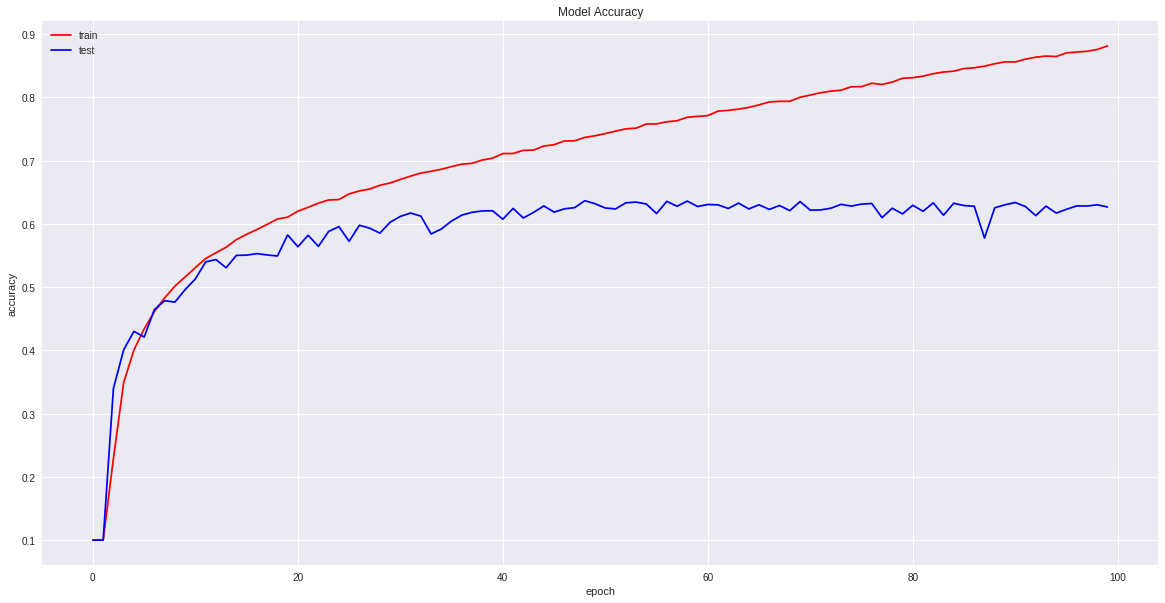

In [22]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


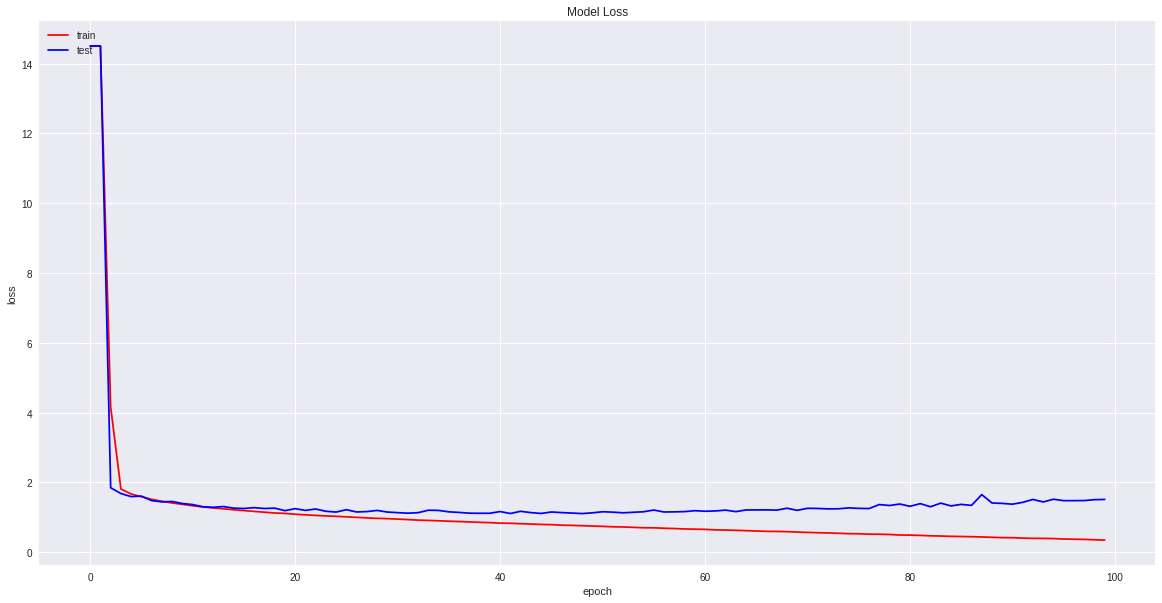

In [23]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        3.0G        203M        253M        9.6G        9.3G
Swap:            0B          0B          0B
